In [184]:
%matplotlib inline 

In [185]:
import numpy as np
import matplotlib.pyplot as plt

### Positional Encoding

In [186]:
x = np.arange(0,4*np.pi,0.1)

In [187]:
y = np.sin(x)

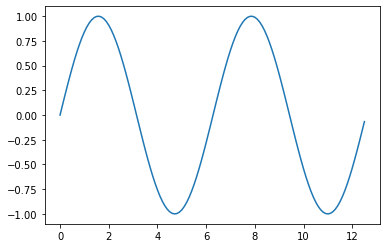

In [188]:
plt.plot(x,y)
plt.show()

### Limitation of transformer

### What is positional embeding?

Positional embedding is a just a list of numbers (aka: matrix) that represents a word. When you start to train the model, these numbers will be initialize randomly and will update iteratively during training.

##### How these number will be update?

The goal is update these numbers somehome make the loss function's value decrease by using gradient descent

### Jargons

For each word
- Text Embedding: a list of numbers that somehow represent the meaning of the word
- Positional Embedding: a list of numbers that somehow represent the meaning of the word's position

### Why positional encoding the way it was?

So conditions that a positional encoding should satisfy

Unlike the RNN, which takes input as sequence. For example, to feed the sentence: "Persistent is all you need" to an RNN

The order of words you feed to RNN will yield difference results

to feed the word `Persistence`, then `is`,... `need`

Calculate the positional embedding of the word `you`

### Build it from scratch

##### Text to Index

In [256]:
text = "Persistent is all you need"

In [257]:
text

'Persistent is all you need'

Now we create a function the return the correspond index of each word in an sentence

In [258]:
def text2idx(x):
    words = x.split(' ')
    return [i for i, w in enumerate(words)]

In [259]:
idxs = text2idx(text)

In [255]:
idxs

[0, 1, 2, 3, 4]

##### Positional Encoding

For each word, it maps to a vector that have 5 numbers (aka: dimension)

$\text{Positional Vector}(p, i_{odd})=\sin \left(\frac{\mathrm{p}}{\mathrm{n}^{2 \mathrm{i} / \mathrm{d}}}\right)$

$\text{Positional Vector}(p, i_{even})=\cos \left(\frac{\mathrm{p}}{\mathrm{n}^{2 \mathrm{i} / \mathrm{d}}}\right)$

For each word,
- `p` is the position of the word in the sequence
- `i` is the index of the number of the position embedding
- `d` is the number of numbers in the text embedding (aka: dimension), it must be the same as text embedding
- `n` is a user-fined number, set by 10,000 by the author of the original paper

The sin function use for odd position. The cosin function use for even position

In [269]:
class PostionalEncoding:
    def __init__(self, n, d):
        self.d = d
        self.n = n
        self.embeddings = None
    
    def encode(self, idxs):
        n_words = len(idxs)
        self.embeddings = np.zeros((n_words, self.d))
        
        for p in range(n_words):
            for i in range(self.d):
                self.embeddings[p][i] = self.by_sin(p, i, self.d) if i % 2 == 0 else self.by_cosin(p, i, self.d)
        
        return self.embeddings
    
    def by_sin(self, p, i, d):
        denomiator = np.power(self.n, (2*i/d))
        return np.sin(p / denomiator)
    
    def by_cosin(self, p, i, d):
        denomiator = np.power(self.n, (2*i/d))
        return np.cos(p / denomiator)

Suppose we specify `n` equals to 200, and `d` equals to `5`

In [270]:
encoder = PostionalEncoding(n=200, d=5)

Let's start simple first by only calculate the positional embedding of the word `all`, which have `i` equals to 2 

In [275]:
encoder.by_sin(p=2, i=1, d=len(idxs))

0.23792106149977424

Now start to calculate the positional embedding for `text`

In [277]:
embeddings = encoder.encode([0, 1, 2, 3])

In [279]:
embeddings

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [8.41470985e-01, 9.92795169e-01, 1.44264986e-02, 9.99998499e-01,
        2.08138300e-04],
       [9.09297427e-01, 9.71284494e-01, 2.88499945e-02, 9.99993994e-01,
        4.16276592e-04],
       [1.41120008e-01, 9.35777938e-01, 4.32674858e-02, 9.99986487e-01,
        6.24414865e-04]])

So for the word `all`

In [281]:
embeddings[2]

array([9.09297427e-01, 9.71284494e-01, 2.88499945e-02, 9.99993994e-01,
       4.16276592e-04])

### Compare different `n` and `d`

In [243]:
ns = np.arange(0, 500, 100)

In [244]:
ns

array([  0, 100, 200, 300, 400])

In [245]:
idxs

[0, 1, 2, 3, 4]

In [246]:
embeddings = [PostionalEncoding(n=n, d=5).encode(idxs) for n in ns]

/tmp/ipykernel_68/2089767210.py:23: RuntimeWarning: invalid value encountered in double_scalars
  return np.cos(p / denomiator)
/tmp/ipykernel_68/2089767210.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return np.sin(p / denomiator)
/tmp/ipykernel_68/2089767210.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  return np.cos(p / denomiator)
/tmp/ipykernel_68/2089767210.py:23: RuntimeWarning: invalid value encountered in cos
  return np.cos(p / denomiator)
/tmp/ipykernel_68/2089767210.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sin(p / denomiator)
/tmp/ipykernel_68/2089767210.py:19: RuntimeWarning: invalid value encountered in sin
  return np.sin(p / denomiator)


In [247]:
embeddings

[array([[ 0.        ,         nan,         nan,         nan,         nan],
        [ 0.84147098,         nan,         nan,         nan,         nan],
        [ 0.90929743,         nan,         nan,         nan,         nan],
        [ 0.14112001,         nan,         nan,         nan,         nan],
        [-0.7568025 ,         nan,         nan,         nan,         nan]]),
 array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00],
        [ 8.41470985e-01,  9.87466836e-01,  2.51162229e-02,
          9.99992076e-01,  6.30957303e-04],
        [ 9.09297427e-01,  9.50181503e-01,  5.02165994e-02,
          9.99968302e-01,  1.26191435e-03],
        [ 1.41120008e-01,  8.89078609e-01,  7.52852930e-02,
          9.99928681e-01,  1.89287090e-03],
        [-7.56802495e-01,  8.05689779e-01,  1.00306487e-01,
          9.99873211e-01,  2.52382670e-03]]),
 array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00